In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

# Generate make_moons dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Create a DataFrame from the dataset
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y

# Display the first few rows of the DataFrame
df.head()

,feature1,feature2,target
0,1.877563,0.568394,1
1,0.368780,-0.348945,1
2,0.965153,0.109218,0
3,0.485997,0.202913,1
4,1.725326,0.533676,1


In [3]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

# Initialize random forest (RF) classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)

# Train the RF classifier
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

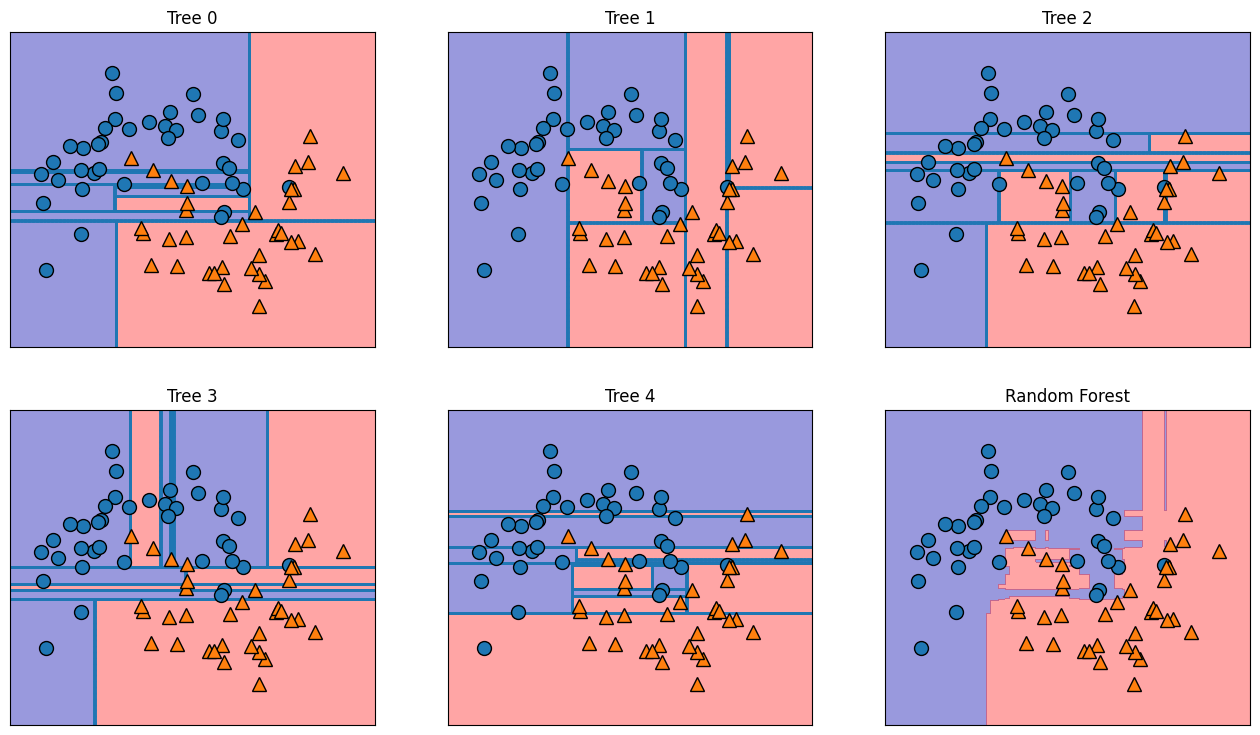

In [4]:
# Visualize the decision boundaries learned by each tree
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()